In [9]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [10]:
random.seed(1)

data_dir = '../data/'

In [11]:
df = pd.read_csv(os.path.join(data_dir, 'combined.csv'))

df.head()

,Sample_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,Disease,characteristics_ch1_bmi
0,GSM1501013,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,...,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,normal control,27.1
1,GSM1501014,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,...,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,healthy obese,30.5
2,GSM1501015,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,...,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,normal control,25.3
3,GSM1501016,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,...,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,normal control,25.8
4,GSM1501017,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,...,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,normal control,23.5


In [12]:
le = LabelEncoder()

y = le.fit_transform(df['Disease'])

X = df.drop(columns = ['Sample_ID', 'Disease'])
X.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283787,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,characteristics_ch1_bmi
0,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,3.010408,...,-0.246719,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,27.1
1,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,3.464364,...,0.040158,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,30.5
2,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,2.829070,...,-0.248596,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,25.3
3,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,2.733645,...,-0.086860,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,25.8
4,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,2.708227,...,0.337941,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,23.5


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)


(106, 21662)
(27, 21662)


In [14]:
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
]
pipeline = ImbPipeline(pipeline_steps)


Starting RandomizedSearchCV on Pipeline...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
RandomizedSearchCV on Pipeline complete.

Best hyperparameters found for the pipeline:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 5, 'classifier__max_features': 0.1, 'classifier__max_depth': 5, 'classifier__bootstrap': True}

Best cross-validation score:
0.6755195742208728

Best Pipeline Model:
Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, max_features=0.1,
                                        min_samples_leaf=5, min_samples_split=5,
                                        random_state=42))])

--- Evaluation of Best Tuned Pipeline on Test Set ---
Accuracy: 0.8148148148148148

Classification Report:
                precision    recall  f1-score  support
healthy obese    0.714286  1.000000  0.833333      5.0

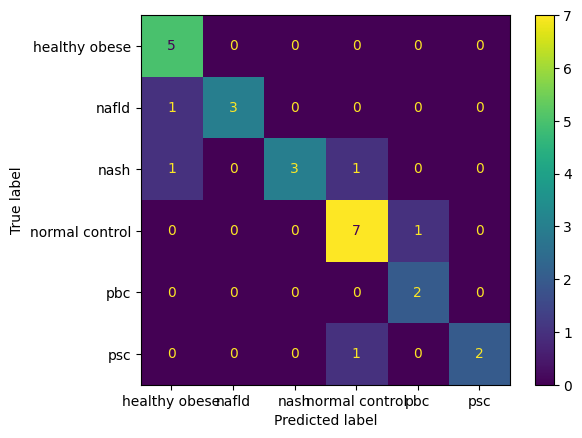

In [15]:
param_dist = {

    'classifier__n_estimators': [100, 250, 500, 1000],

    'classifier__max_features': ['sqrt', 'log2', 0.05, 0.1], 
    
    'classifier__max_depth': [3, 5, 10, 15, 20, None],

    'classifier__min_samples_split': [2, 5, 10, 20],

    'classifier__min_samples_leaf': [1, 2, 5, 10],

    'classifier__bootstrap': [True] 
}
  
random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline, 
    param_distributions=param_dist,
    scoring='f1_weighted',  
    n_iter=5, 
    cv=5, 
    verbose=2, 
    n_jobs=-1)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
random_forest_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {random_forest_accuracy}")
print("\nClassification Report:")
random_forest_classification_report = classification_report(y_test, y_pred_tuned, target_names=le.classes_, output_dict=True)
random_forest_classification_report = pd.DataFrame(random_forest_classification_report).transpose().drop('accuracy')
print(random_forest_classification_report)

best_scaler = best_pipeline_model.named_steps['scaler']
best_classifier = best_pipeline_model.named_steps['classifier']

random_forest_conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=random_forest_conf_matrix,
                              display_labels=le.classes_)
disp.plot()
plt.show()


--- Top 20 Most Relevant Features ---
                       feature  importance
21661  characteristics_ch1_bmi    0.069853
4540           ENSG00000117394    0.015518
10259          ENSG00000162194    0.014347
4854           ENSG00000120254    0.010249
17628          ENSG00000204084    0.010034
10262          ENSG00000162231    0.009646
18396          ENSG00000210191    0.008965
7812           ENSG00000141448    0.008898
13167          ENSG00000174943    0.008874
15051          ENSG00000185262    0.008362
8849           ENSG00000149357    0.007980
16715          ENSG00000198839    0.007902
10223          ENSG00000161912    0.007755
3187           ENSG00000106355    0.007244
3875           ENSG00000112183    0.007065
6322           ENSG00000132329    0.006263
21453          ENSG00000276410    0.006261
10876          ENSG00000164342    0.005701
4744           ENSG00000119509    0.005292
1171           ENSG00000072657    0.005120


<Axes: xlabel='importance', ylabel='feature'>

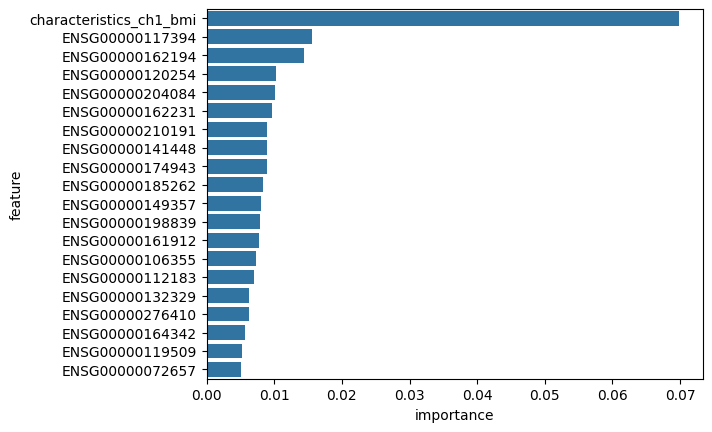

In [16]:
best_classifier = best_pipeline_model.named_steps['classifier']
importances = best_classifier.feature_importances_

feature_names = X_train.columns.tolist()

random_forest_feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

random_forest_feature_importance_df = random_forest_feature_importance_df.sort_values(by='importance', ascending=False)

print("\n--- Top 20 Most Relevant Features ---")
print(random_forest_feature_importance_df.head(20))

sns.barplot(x='importance', y='feature', data=random_forest_feature_importance_df.head(20))